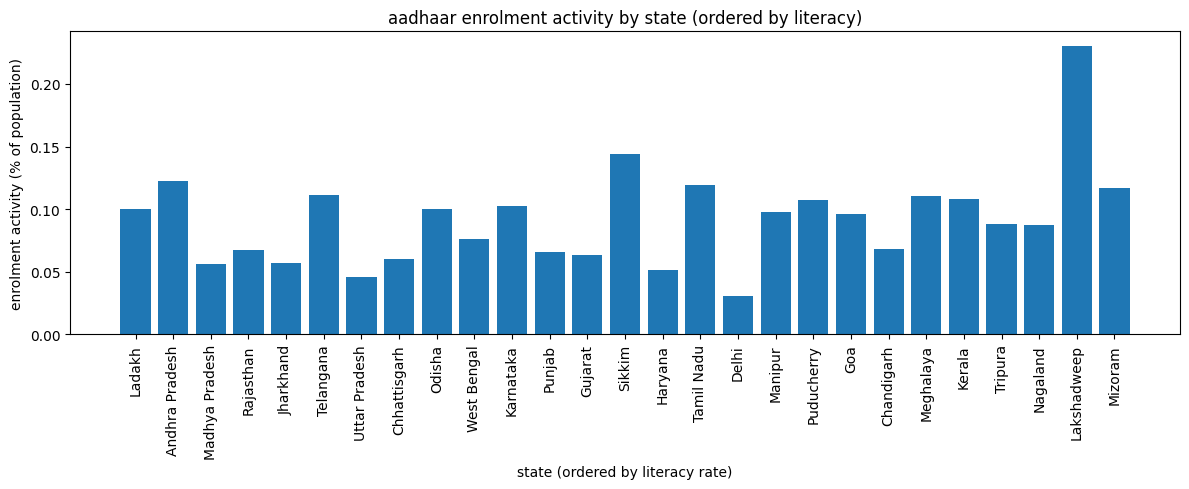

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


enrolment_df=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")

enrolments=(
    enrolment_df
    .groupby("state")
    .size()
    .rename("enrolment_events")
    .reset_index()
)


population=pd.read_csv("../sql/data/Population of Indian states 2025.csv")

population=population.rename(columns={
    "State/UT":"state",
    "Population 2025":"population"
})

population["population"]=(
    population["population"]
    .astype(str)
    .str.replace(",","")
    .astype(int)
)

df=enrolments.merge(population,on="state",how="inner")


df["enrolment_activity_percent"]=(df["enrolment_events"]/df["population"])*100



literacy=pd.read_excel("../sql/data/Aadhar_literacy.xlsx")
literacy.columns=literacy.columns.str.lower().str.strip()

lit_col=[c for c in literacy.columns if "literacy" in c][0]

literacy=literacy.rename(columns={
    literacy.columns[0]:"state",
    lit_col:"literacy_rate"
})

literacy["literacy_rate"]=(
    literacy["literacy_rate"]
    .astype(str)
    .str.replace("%","")
    .str.strip()
)

literacy["literacy_rate"]=pd.to_numeric(literacy["literacy_rate"],errors="coerce")

literacy=literacy.dropna(subset=["state","literacy_rate"])



df=df.merge(literacy,on="state",how="inner")


df=df.sort_values("literacy_rate")



plt.figure(figsize=(12,5))
plt.bar(df["state"],df["enrolment_activity_percent"])
plt.xticks(rotation=90)
plt.xlabel("state (ordered by literacy rate)")
plt.ylabel("enrolment activity (% of population)")
plt.title("aadhaar enrolment activity by state (ordered by literacy)")
plt.tight_layout()
plt.show()
